# 重复个体问题

In [2]:
from deap import tools

list = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]
for i in range(len(list)):
    print(f'第{i}次选择:',tools.selRandom(list, 2))

第0次选择: [9, 7]
第1次选择: [25, 30]
第2次选择: [15, 12]
第3次选择: [13, 14]
第4次选择: [24, 13]
第5次选择: [9, 22]
第6次选择: [10, 1]
第7次选择: [7, 24]
第8次选择: [29, 1]
第9次选择: [9, 16]
第10次选择: [15, 8]
第11次选择: [16, 25]
第12次选择: [9, 3]
第13次选择: [6, 15]
第14次选择: [4, 3]
第15次选择: [12, 5]
第16次选择: [21, 20]
第17次选择: [29, 12]
第18次选择: [24, 19]
第19次选择: [7, 23]
第20次选择: [16, 18]
第21次选择: [23, 26]
第22次选择: [6, 1]
第23次选择: [14, 24]
第24次选择: [23, 16]
第25次选择: [20, 13]
第26次选择: [2, 26]
第27次选择: [3, 26]
第28次选择: [13, 6]
第29次选择: [6, 29]


In [1]:
from data_preprocess import data_loader, data_preprocess
import numpy as np
import warnings

warnings.filterwarnings("ignore")  # 忽略警告

file_path = '../datasets/dat/'
save_path = './tsne_results_1128_p_a/'
# datasetnames = ['iris0', 'ecoli1', 'glass0', 'glass1', 'haberman', 'pima', 'segment0', 'vowel0', 'wisconsin', 'yeast1']
datasetnames = ['iris0']
if __name__ == '__main__':
    for datasetname in datasetnames:
        X, y = data_loader(file_path + datasetname + '.dat')
        with open('../log.txt', 'a') as f:
            print(f'数据集：{datasetname}', file=f)
            print(f'实例数量：{X.shape[0]}', file=f)
            print(f'特征数量：{X.shape[1]}', file=f)

        X_train, X_test, y_train, y_test = data_preprocess(X, y, random_state=42)

        from sklearn.preprocessing import StandardScaler
        from visualize import tsne_visualization_binary

        scaler = StandardScaler()

        # 使用t-SNE进行降维
        X_tsne = tsne_visualization_binary(scaler.fit_transform(X_train), y_train,
                                           save_path=save_path + datasetname,
                                           filename=datasetname, perplexity=30)  # 传入的是标准化后的特征数据

        from config import EvolutionaryParameterConfig

        from moea_de import DSSMOTE_P_A

        evol_parameter = EvolutionaryParameterConfig(30, 0.8, 0.2, 100, False)

        dgpa = DSSMOTE_P_A(X=X_train, y=y_train, evol_parameter=evol_parameter)
        X_syn, y_syn = dgpa.fit_resample_synthesis_only()

        print(X_syn)
        print(y_syn)

        # 可视化
        y_syn = [2 for _ in range(len(y_syn))]
        X_train_resampled = np.vstack((X_train, X_syn))
        y_train_resampled = np.hstack((y_train, y_syn))
        # 4. 使用t-SNE进行降维
        X_tsne_resampled_p_a = tsne_visualization_binary(scaler.fit_transform(X_train_resampled), y_train_resampled,
                                                         save_path=save_path + datasetname,
                                                         filename=datasetname + '_dgpa', perplexity=30)


t-SNE可视化图片已保存至: ./tsne_results_1128_p_a/iris0\iris0.png
第 1 轮合成
########### 	 Start the evolution! 	 ##########
重复个体数： 6
第0代平均约束值 {'mean_maj_min_distance': 0.07827837211799443, 'mean_min_center_distance': 1.2890044479940198e-05, 'mean_cosine_angle': 0.08889725136064378}
重复个体数： 9
第1代平均约束值 {'mean_maj_min_distance': 0.0355373062573977, 'mean_min_center_distance': 5.8313810560914614e-06, 'mean_cosine_angle': 0.05239999432727189}
重复个体数： 6
第2代平均约束值 {'mean_maj_min_distance': 0.00047127955699076374, 'mean_min_center_distance': 2.811620305297419e-07, 'mean_cosine_angle': 0.0}
重复个体数： 6
第3代平均约束值 {'mean_maj_min_distance': 0.0, 'mean_min_center_distance': 1.4458626248810186e-07, 'mean_cosine_angle': 0.0}
重复个体数： 3
第4代平均约束值 {'mean_maj_min_distance': 0.0, 'mean_min_center_distance': 4.591791986977093e-08, 'mean_cosine_angle': 0.0}
重复个体数： 3
第5代平均约束值 {'mean_maj_min_distance': 0.0, 'mean_min_center_distance': 6.1581516044923095e-09, 'mean_cosine_angle': 0.0}
重复个体数： 6
第6代平均约束值 {'mean_maj_min_distance': 0.

图形已保存为 'convergence_curve.png'


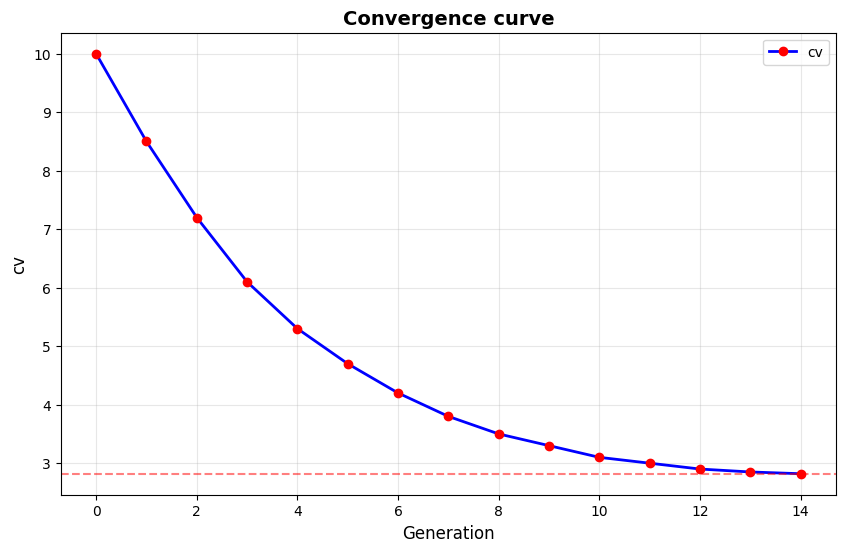

In [4]:
import matplotlib.pyplot as plt

# 你的收敛曲线数据（这里用示例数据，请替换为你的实际数据）
convergence_curve = [10, 8.5, 7.2, 6.1, 5.3, 4.7, 4.2, 3.8, 3.5, 3.3, 3.1, 3.0, 2.9, 2.85, 2.82]

# 创建图形
plt.figure(figsize=(10, 6))

# 绘制曲线
plt.plot(convergence_curve, 'b-o', linewidth=2, markersize=6, 
         markerfacecolor='red', markeredgecolor='red', label='cv')

# 设置图形属性
plt.xlabel('Generation', fontsize=12)
plt.ylabel('cv', fontsize=12)
plt.title('Convergence curve', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.legend()

# 添加一些辅助线
plt.axhline(y=min(convergence_curve), color='r', linestyle='--', alpha=0.5, label=f'最优值: {min(convergence_curve):.3f}')

# 保存图形
plt.savefig('convergence_curve.png', dpi=300, bbox_inches='tight', facecolor='white')
print("图形已保存为 'convergence_curve.png'")

# 显示图形
plt.show()